In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram



In [2]:
#Downloading csv and dropping filename, and the papaers written by Jay and Hamilton&Madison
    #used github to allow it to work on colab
file = pd.read_csv("https://raw.githubusercontent.com/williamhigginsisthebest/IST407/main/csv_files/HW4-data-fedPapers85.csv")
file = file.drop('filename', axis = 1)
file = file[file.author != "Jay"]
df = file[file.author != "HM"]

In [3]:
#Normalizing Data
    #I removed authors (and saved it to another variable for later) to make sure it does not interfer with scaler / clustering
if 'author' in df:
    authors_df = df["author"]
    df = df.drop('author', axis = 1)
scaler = StandardScaler()
scale_df = scaler.fit_transform(df)

In [9]:
#appling kmeans to the dataset
kmeans = KMeans(n_clusters = 2, random_state=0, n_init="auto").fit(scale_df)
y_kmeans = kmeans.fit(scale_df)
labels = y_kmeans.labels_


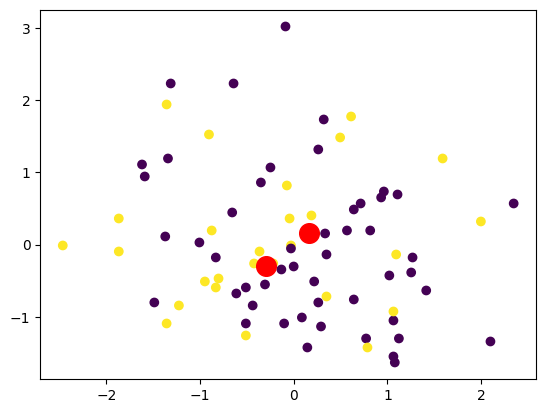

In [5]:
#scatterplot
#Why are the scatterplots inside each other and not clearly seperated? I removed Jay and the papers that Hamilton and madison worked together on. 
    #For the scatterplot, I tried to apply y_kmeans but it gives an error stating that "'KMeans' object is not subscriptable"
plt.scatter(scale_df[:,0], scale_df[:,1], c = labels)
plt.scatter(y_kmeans.cluster_centers_[:,0], y_kmeans.cluster_centers_[:,0], s = 200, c = 'red')
plt.show()

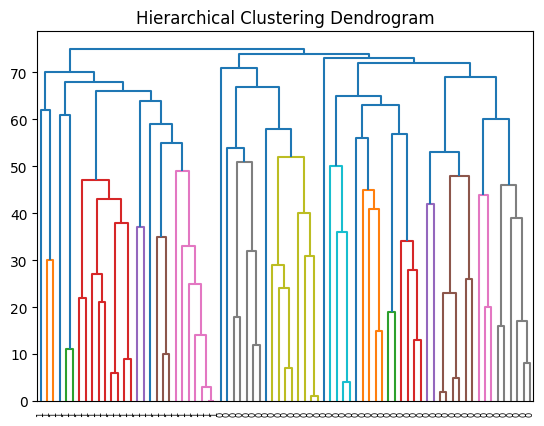

In [6]:
#dendrogram
#Function taken from https://github.com/scikit-learn/scikit-learn/blob/70cf4a676caa2d2dad2e3f6e4478d64bcb0506f7/examples/cluster/plot_hierarchical_clustering_dendrogram.py
#One type of tree model.
    #I was wondering why this one looks so much diffrent then the one below it.
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(n_clusters=2)

model = model.fit(scale_df)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=model.labels_)
plt.show()

{'icoord': [[155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [115.0, 115.0, 134.375, 134.375],
  [105.0, 105.0, 124.6875, 124.6875],
  [95.0, 95.0, 114.84375, 114.84375],
  [85.0, 85.0, 104.921875, 104.921875],
  [75.0, 75.0, 94.9609375, 94.9609375],
  [65.0, 65.0, 84.98046875, 84.98046875],
  [55.0, 55.0, 74.990234375, 74.990234375],
  [45.0, 45.0, 64.9951171875, 64.9951171875],
  [35.0, 35.0, 54.99755859375, 54.99755859375],
  [25.0, 25.0, 44.998779296875, 44.998779296875],
  [15.0, 15.0, 34.9993896484375, 34.9993896484375],
  [5.0, 5.0, 24.99969482421875, 24.99969482421875]],
 'dcoord': [[0.0, 9.486101793793237, 9.486101793793237, 0.0],
  [0.0, 9.508967339025546, 9.508967339025546, 9.486101793793237],
  [0.0, 9.56542712689729, 9.56542712689729, 9.508967339025546],
  [0.0, 9.650495739865828, 9.650495739865828, 9.56542712689729],
  [0.0, 9.656553413926552, 9.656553413926552, 9.650495739865828],
  [0.0, 9.

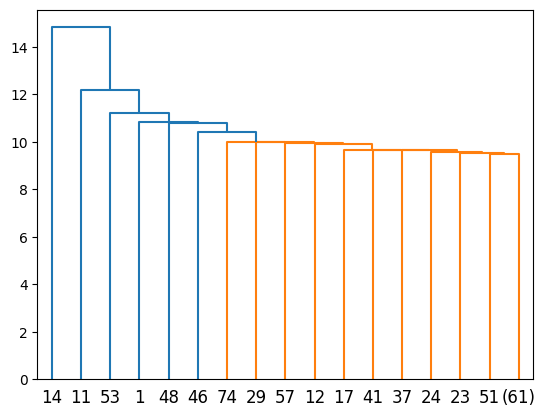

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
#second type of tree model. 
#How are you supposed to get useful data out of the tree?

data = scale_df

Z = linkage(data)

dendrogram(Z, truncate_mode= 'level', p = 15)

In [8]:
print('Datatype:', scale_df)

Datatype: [[-0.36465499 -0.09661901  0.26222847 ...  0.35776739  1.30919265
  -0.19121972]
 [-1.86625347  0.36056701  0.77019305 ... -0.59765766  0.5281935
  -0.19121972]
 [ 0.49548395  1.48275088  0.13523732 ... -1.31422644 -0.51805065
  -0.19121972]
 ...
 [-1.86625347 -0.09661901  5.08789199 ...  0.83547991 -1.2106348
  -0.19121972]
 [-0.90406415  1.52431324  0.13523732 ... -0.67727641 -1.18116314
  -0.19121972]
 [ 0.61211296  1.77368744  0.00824618 ...  0.19852988 -0.29701315
  -0.19121972]]
